#  The irreducible mass of black holes

This is an example that comes straight out of my research in general relativity.

**Gerosa, Fabbri, Sperhake (2022) "*The irreducible mass and the horizon area of LIGO's black holes*" [arxiv:2202.08848](https://arxiv.org/abs/2202.08848), [CQG 39 (2022) 175008](https://iopscience.iop.org/article/10.1088/1361-6382/ac8332)**

(some of the calculations there were first worked out by Cecilia Fabbri in her BSc thesis with me).

Consider a rotating black hole. In [1969](https://ui.adsabs.harvard.edu/abs/1969NCimR...1..252P/abstract), Roger Penrose (now [Nobel Prize in Physics](https://www.nobelprize.org/prizes/physics/2020/penrose/facts/) for the theory of black holes) discovered that one can extract energy from a rotating black hole:

![](https://inspirehep.net/files/268d28446b405e134199d84f67c23792)

(figure from [Harada, Kimura 2014](https://ui.adsabs.harvard.edu/abs/2014CQGra..31x3001H/abstract)).

Maybe some of you has seen this already in your GR class? In any case, a rotating black-hole has a region called ergosphere such that infalling particles have negative energy. Penrose imagined a particle that enters that region and decays: half will fall in and half will escape to infinity, carring some energy with it. In a nutshell, we've extracted energy=mass from a black hole! It turns out that one also has to extract angular momentum, not just energy (and here you'll need some GR do to this calculation, see e.g. the famous textbook by [Misner, Thorne and Weeler](https://press.princeton.edu/books/hardcover/9780691177793/gravitation)). But angular momentum runs our first, such that a repeated series of Penrose processes leaves behind a non-rotating BH with a remnant mass which is called "irreducible". This is a famous result by [Christodoulou 1970](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.25.1596) and is closely related to the even more famous area law by [Hawking (1971)](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.26.1344) (which in turns is the foundation of black-hole thermodynamics -- for you, my theorethical physics friend).


For a BH of mass $M$ spin $\chi\in [0,1]$, the irreducible mass is 
$$
M_{\rm irr} = %\sqrt{\frac{M^2+\sqrt{M^4-S^2}}{2}} = 
 M \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}}
$$
For convenience, let us define 

$$f(\chi) = \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}} = \frac{M_{\rm irr}}{M}$$

Suppose you have repeated measurments of $M$ and $\chi$. This is just because we're still frequentists for now. When we will put our Bayesian hat on, these distributions will be the *posterior samples* from a single measurement.

Let's assume that

- the spin $\chi$ is uniformly distributed between 0 and 1.
- the mass $M$ is normally distributed with mean $\mu$ and standard deviation $\sigma$.

These are simplistic assumption that, however, are not too far from what we are now measuring with gravitational-wave detectors. It's a toy model, but not a totally unreasonable one.

**Tasks**:

1. Start with a value of $\sigma=0.02$. Note that $\mu$ is a scale and not a parameter: you can normalize all quantities with a dimension of mass by $\mu$. Just set $\mu=1$ in your code and remember that all masses in the problem are measured in units of $\mu$. 

2. Plot the resulting pdf of $M_{\rm irr}$. First try an histogram with one the rules of thumb we've seen above.

*Hint*: You don't know the functional form of the pdf of $M_{\rm irr}$... but you don't need it if you just want to generate samples! That's the nice thing about numerics!

3. Using the same samples, plot the distribution of $M_{\rm irr}$ using a KDE.


In [11]:
import numpy as np
import pylab as plt
import scipy.stats as stats
from tqdm import tqdm

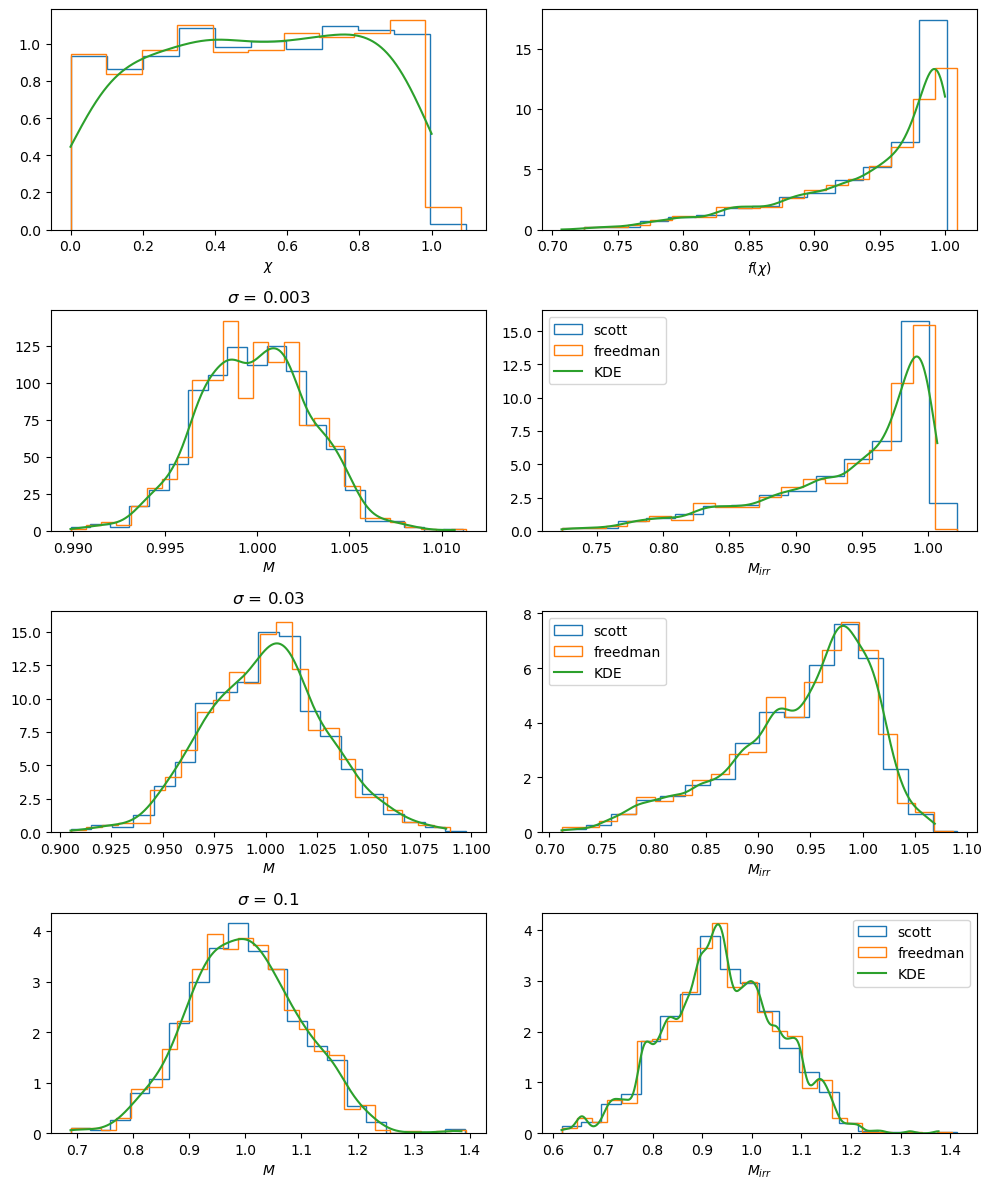

In [45]:

# Generate random spin chi and compute f(chi)
chi = stats.uniform(0,1).rvs(1000)
f_chi = np.sqrt((1 + np.sqrt(1 - chi**2)) / 2)

# Define grids for KDE evaluation
chi_grid = np.linspace(0, 1, 1000)
f_chi_grid = np.linspace(np.sqrt(1/2), 1, 1000)

# KDE function
def kde_sklearn(data, grid, bandwidth=1.0, kernel="linear"):
    kde_skl = KernelDensity(bandwidth=bandwidth, kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(grid[:, np.newaxis])
    return np.exp(log_pdf)

# Create figure and axes
fig, ax = plt.subplots(4, 2, figsize=(10, 12))

# Row 0: histogram and KDE of chi
_ = fancyhist(chi, bins="scott", histtype="step", density=True, ax=ax[0, 0])
_ = fancyhist(chi, bins="freedman", histtype="step", density=True, ax=ax[0, 0])
kde_spin = kde_sklearn(chi, chi_grid, bandwidth=0.1, kernel="gaussian")
ax[0, 0].plot(chi_grid, kde_spin)
ax[0, 0].set_xlabel("$\chi$")

# Row 1: histogram and KDE of f(chi)
_ = fancyhist(f_chi, bins="scott", histtype="step", density=True, ax=ax[0, 1])
_ = fancyhist(f_chi, bins="freedman", histtype="step", density=True, ax=ax[0, 1])
kde_f_chi = kde_sklearn(f_chi, f_chi_grid, bandwidth=0.01, kernel="gaussian")
ax[0, 1].plot(f_chi_grid, kde_f_chi)
ax[0, 1].set_xlabel("$f(\chi)$")

# Rows 2–4: M and M_irr for different sigmas
for i, sigma in enumerate([0.003, 0.03, 0.1]):
    row = i + 1
    M = stats.norm(1, sigma).rvs(1000)
    M_irr = M * f_chi

    M_grid = np.linspace(M.min(), M.max(), 1000)
    M_irr_grid = np.linspace(M_irr.min(), M_irr.max(), 1000)

    # M histograms and KDE
    _ = fancyhist(M, bins="scott", histtype="step", density=True, ax=ax[row, 0])
    _ = fancyhist(M, bins="freedman", histtype="step", density=True, ax=ax[row, 0])
    kde_M = kde_sklearn(M, M_grid, bandwidth=sigma/4, kernel="gaussian")
    ax[row, 0].plot(M_grid, kde_M)
    ax[row, 0].set_title(f'$\sigma$ = {sigma}')
    ax[row, 0].set_xlabel("$M$")

    # M_irr histograms and KDE
    _ = fancyhist(M_irr, bins="scott", histtype="step", density=True, ax=ax[row, 1], label='scott')
    _ = fancyhist(M_irr, bins="freedman", histtype="step", density=True, ax=ax[row, 1], label='freedman')
    kde_M_irr = kde_sklearn(M_irr, M_irr_grid, bandwidth=0.01, kernel="gaussian")
    ax[row, 1].plot(M_irr_grid, kde_M_irr, label='KDE')
    ax[row, 1].legend()
    ax[row, 1].set_xlabel('$M_{irr}$')

plt.tight_layout()
plt.show()


**K-S tests**

4. Compute the KS distance between ${M_{\rm irr}}$ and ${f}$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$. 

5. Compute the KS distance between ${M_{\rm irr}}$ and $M$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$.

6. You should find that (i) $M_{\rm irr}$ is distributed like $f$ if ${\sigma}\ll \mu$ and (ii) $M_{\rm irr}$ is distributed like $M$ if  $\sigma\gg \mu$.


The Kolmogorov–Smirnov (KS) test is a non-parametric statistical test used to compare probability distributions. There are two main types:
1. One-sample KS test is used to test if a sample comes from a specified theoretical distribution (e.g., normal, uniform). The null hypothesis ($H_0$) is that the sample is drawn from the specified distribution. The statistics is the maximum distance between the empirical cumulative distribution function (ECDF) of the sample and the CDF of the reference distribution.
$$
D = \sup\limits_{x} \left| F_n(x) - F(x) \right|
$$

2. Two-sample KS test: used to test if two samples come from the same distribution. Null hypothesis ($H_0$): The two samples are drawn from the same continuous distribution. Statistic: The maximum difference between their two ECDFs.
$$
D = \sup\limits_{x} \left| F_n(x) - G_m(x) \right|
$$

Why it's useful
- Distribution-free: Makes no assumption about the underlying distribution.
- Sensitive: Detects differences in both location and shape of distributions.
  
Limitations
- Less powerful than parametric tests when the distribution is known.
- Assumes continuous distributions — not ideal for discrete data.

In [15]:
scales= np.logspace(-5,5,20) #sigmas
ksM=[]
ksf = []

N=100000
chi = np.random.uniform(0,1,N) #spins
f_chi = np.sqrt((1+np.sqrt(1-chi**2))/2)

for scale in scales:

    M=np.random.normal(loc=1,scale=scale,size=N)

    ksM.append(stats.ks_2samp(M, M*f_chi))        # are M_irriducible and M subject to the same probability distribution?
    ksf.append(stats.ks_2samp(f_chi, M*f_chi))    # are M_irriducible and f_chi subject to the same probability distribution?

ksM= np.array(ksM)
ksf= np.array(ksf)


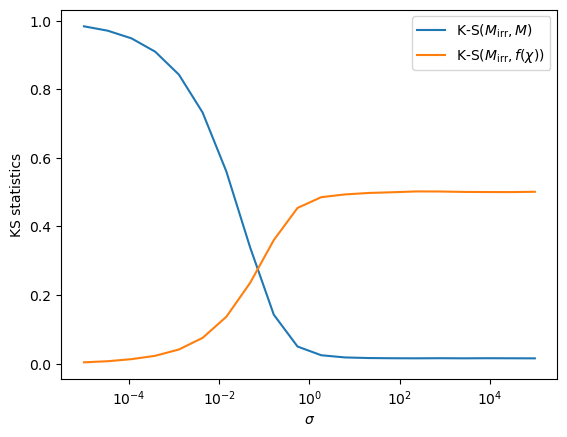

In [10]:
plt.plot(scales,ksM[:,0],label="K-S$(M_{\\rm irr}, M)$")
plt.plot(scales,ksf[:,0],label="K-S$(M_{\\rm irr}, f(\chi))$")
plt.semilogx()
plt.xlabel("$\sigma$")
plt.ylabel('KS statistics')
plt.legend();

7. Compute the pdfs of $M_{\rm irr}$ from their mathematical definitions, plot them, and check they agree with your KDE.

*Hint (for point 7 above)*: First compute the pdf of $f$, that is just a change of variable. We saw how to do this in a previous lecture. The answer is:
$$
\pi(f) = 2\frac{2 f^2-1}{\sqrt{1 - f^2}}\,.
$$

*Another hint (still for point 7 above)*: Then compute the pdf of $M_{\rm irr}$, you want to use [this theorem](https://en.wikipedia.org/wiki/Distribution_of_the_product_of_two_random_variables) for the product of two random variables. The answer is only semi-analytic (unless you know how to solve that integral? If so please tell me!)
$$
p(M_{\rm irr})  = \frac{\sqrt{2/\pi}}{\sigma} \int_{1/\sqrt{2}}^1 \exp\left[{-\frac{(M_{\rm irr}/f -\mu)^2}{2\sigma^2}}\right]  \frac{2 f^2-1}{f \sqrt{1 - f^2}}  \,\, {\rm d}f\,
$$
This can be easily solved numerically.

*Yet another hint:* If any any time you get lost in the calculation, it helps checking that your pdfs are normalized as they should.




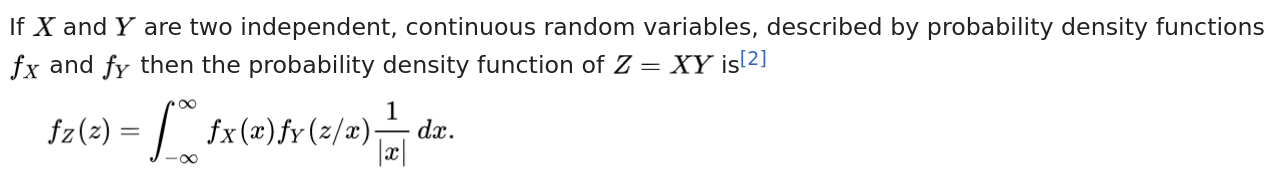

https://en.wikipedia.org/wiki/Distribution_of_the_product_of_two_random_variables


$$f(\chi) = \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}}$$

$$\text{pdf}(\chi)d\chi = \text{pdf}(f)df$$

$$\text{pdf}(\chi) = 1$$

$$\text{pdf}(f) = 1 \times \frac{d\chi}{df} =  2\frac{2 f^2-1}{\sqrt{1 - f^2}}$$

$$
\text{pdf}(M_{\rm irr}) = \int_{-\infty}^{\infty} \text{pdf}(f)\, \text{pdf}(M)\, \frac{1}{f} \, df
= \int_{1/\sqrt{2}}^{1} \mathcal{N}(\mu,\sigma)\, 2\frac{2 f^2 - 1}{\sqrt{1 - f^2}} \, \frac{1}{f} \, df \\
= \frac{\sqrt{2/\pi}}{\sigma} \int_{1/\sqrt{2}}^1 \exp\left[{-\frac{(M - \mu)^2}{2\sigma^2}}\right] \frac{2 f^2 - 1}{f \sqrt{1 - f^2}} \, df
$$



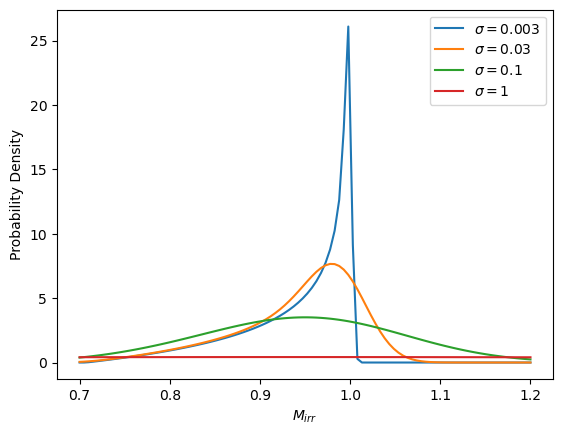

In [33]:
from scipy.integrate import quad

# Define parameters
mu = 1.0

# Define the integrand
def integrand(f, M_irr, mu, sigma):
    return np.exp(-((M_irr / f - mu)** 2) / (2 * sigma** 2)) * (2 * f**2 - 1) / (f * np.sqrt(1 - f**2))

# Range of M_irr values
M_irr_vals = np.linspace(0.7, 1.2, 100)

for sigma in [0.003,0.03,0.1,1]:

    pdf = []
    
    # Compute the integral for each M_irr
    for M_irr in M_irr_vals:
        integral, _ = quad(integrand, 1 / np.sqrt(2), 1, args=(M_irr, mu, sigma))
        # Add the normalization constant from your equation
        result = (np.sqrt(2 / np.pi) / sigma) * integral
        pdf.append(result)
    
    plt.plot(M_irr_vals, pdf, label=f'$\sigma = {sigma}$')


plt.xlabel('$M_{irr}$')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


If you know the underlying distribution (e.g. you expect the data to follow a normal distribution), then parametric tests are generally more powerful than non-parametric tests like the KS test:

1. One-sample test

You want to test whether your sample comes from a known distribution (e.g., normal, exponential):
- Shapiro–Wilk test or Anderson–Darling test — if testing for normality.
- Chi-square goodness-of-fit test — for any discrete distribution or binned continuous data.

2. Two-sample test

You want to test whether two samples come from the same distribution, and you assume a known shape (e.g., both normal):
- t-test — if you're comparing means and assuming both samples are normally distributed and (optionally) with equal variances. Student's t-test for equal variances, or Welch’s t-test for unequal variances
- F-test — for comparing variances, assuming normality.


### Chi-2 test

The Chi-square ($\chi^2$) test is a family of hypothesis tests based on comparing observed frequencies to expected frequencies under a specific hypothesis. It's especially useful for categorical data or binned continuous data. Used for **goodness-of-fit** test (Is this sample consistent with a known distribution?), **test of independence** (Are two categorical variables independent? Example: Is smoking status independent of disease presence?) or **homogeneity test** (Are distributions the same across groups?)

    

You're testing how well the observed data matches what you'd expect under some null hypothesis ($H_0$). The test statistic is:
$$
\chi^2 = \sum_{i=1}^k \frac{(O_i-E_i)^2}{E_i}
$$
Where:
- $O_i$ = observed count in bin $i$
- $E_i$ = expected count in bin $i$
- $k$ = number of bins or categories

Under the null hypothesis, the counts $O_i$​ are assumed to follow a Poisson distribution (or approximately normal for large $E_i$). Therefore $\text{Var}(O_i)=E_i$.

Hypothesis Setup

- $H_0$: The observed distribution matches the expected.
- $H_1$: The observed distribution differs from expected.

You compute the $\chi^2$ statistic and compare it to a critical value from the chi-square distribution with appropriate degrees of freedom:

$$\text{df}=(\text{number of categories})−1−(\text{number of estimated parameters})$$

Then get the p-value and reject $H_0$ if it's below your chosen significance level (e.g. 0.05).

Under $H_0$, when the sample size is large, the deviations between observed and expected frequencies are approximately normally distributed due to the Central Limit Theorem — and squaring them (normalized) yields a chi-square distribution.


0.017239655960641122


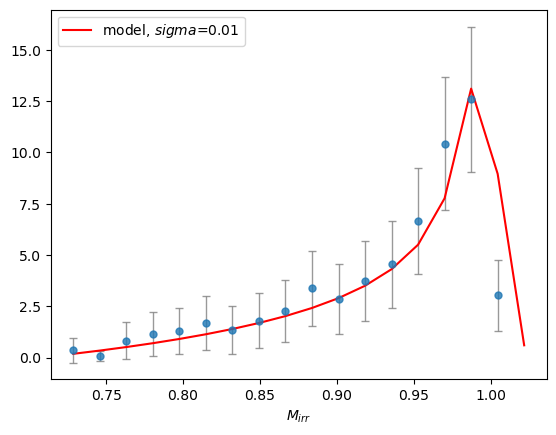

In [76]:
# Generate random spin chi and compute f(chi)
chi = stats.uniform(0,1).rvs(1000)
f_chi = np.sqrt((1 + np.sqrt(1 - chi**2)) / 2)

sigma = 0.01
M = stats.norm(1, sigma).rvs(1000)
M_irr = M * f_chi

freedman_diaconis_bin_size = 2*(np.quantile(M_irr,0.75)-np.quantile(M_irr,0.25))/len(M_irr)**(1/3) 
print(freedman_diaconis_bin_size)

counts, bin_edges = np.histogram(M_irr, 
                                 bins=np.arange(min(M_irr),max(M_irr),freedman_diaconis_bin_size), 
                                 density=True
                                 )

plt.errorbar(bin_edges[:-1], counts, yerr=np.sqrt(counts),
    fmt='o',markersize=5,color='tab:blue',ecolor='gray',elinewidth=1,        
    capsize=3,linestyle='none',alpha=0.8            
)

  


pdf = []
# Compute the integral for each M_irr
for M_irr in bin_edges:
    integral, _ = quad(integrand, 1 / np.sqrt(2), 1, args=(M_irr, mu, sigma))
    # Add the normalization constant from your equation
    result = (np.sqrt(2 / np.pi) / sigma) * integral
    pdf.append(result)

plt.plot(bin_edges, pdf,color='red',label=f'model, $sigma$={sigma}')
plt.xlabel('$M_{irr}$')
plt.legend()
plt.show()

In [79]:
chi2 = np.sum((counts-pdf[:-1])**2 / counts)
print('Reduced chi2 is: ',chi2 / len(counts))

Reduced chi2 is:  0.8748594576418519


The p-value is the probability of observing a chi-squared value greater than or equal to 14.79 under the chi-squared distribution with 17 degrees of freedom:
$$
p = P(\chi^2\geq 14.79)
$$
If the p-value is large (commonly > 0.05), the data is consistent with the model.
If it’s small (e.g., < 0.01), it suggests the model does not fit well.


In [81]:
from scipy.stats import chi2

chi2_val = 14.79
dof = 17

p_value = 1 - chi2.cdf(chi2_val, dof)
print(f'p-value = {p_value:.4f}')

p-value = 0.6106
